In [1]:
# Import libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

In [2]:
# Load the data without parsing
news_df = pd.read_csv("../data/newsData.csv")

# Convert 'date' column to datetime
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')

# Check if conversion worked
news_df[['date']].head()

,date
0,2020-06-05 10:30:54-04:00
1,2020-06-03 10:45:20-04:00
2,2020-05-26 04:30:07-04:00
3,2020-05-22 12:45:06-04:00
4,2020-05-22 11:38:59-04:00


In [3]:
# Compute headline length in characters
news_df['headline_len'] = news_df['headline'].astype(str).apply(len)

# Compute headline word count
news_df['headline_wordcount'] = news_df['headline'].astype(str).apply(lambda x: len(x.split()))

# Descriptive statistics
news_df[['headline_len','headline_wordcount']].describe()


,headline_len,headline_wordcount
count,1.407328e+06,1.407328e+06
mean,7.312051e+01,1.141671e+01
std,4.073531e+01,6.352997e+00
min,3.000000e+00,1.000000e+00
25%,4.700000e+01,7.000000e+00
50%,6.400000e+01,1.000000e+01
75%,8.700000e+01,1.300000e+01
max,5.120000e+02,7.700000e+01


In [4]:
# Count articles per publisher
publisher_counts = news_df['publisher'].value_counts()

# Show top 10 publishers
publisher_counts.head(10)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

In [5]:
# Simple sentiment scoring using TextBlob
news_df['sentiment'] = news_df['headline'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)

# Preview sentiment scores
news_df[['headline','sentiment']].head(10)

,headline,sentiment
0,Stocks That Hit 52-Week Highs On Friday,0.00
1,Stocks That Hit 52-Week Highs On Wednesday,0.00
2,71 Biggest Movers From Friday,0.00
3,46 Stocks Moving In Friday's Mid-Day Session,0.00
4,B of A Securities Maintains Neutral on Agilent...,0.00
5,"CFRA Maintains Hold on Agilent Technologies, L...",0.00
6,"UBS Maintains Neutral on Agilent Technologies,...",0.00
7,Agilent Technologies shares are trading higher...,0.25
8,Wells Fargo Maintains Overweight on Agilent Te...,0.00
9,10 Biggest Price Target Changes For Friday,0.00


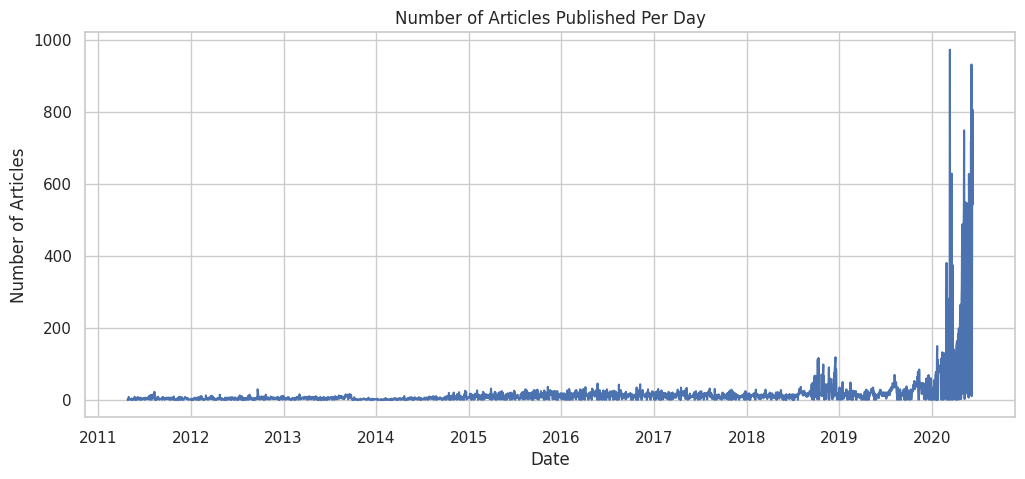

In [6]:
# Drop rows with invalid dates
news_df = news_df.dropna(subset=['date'])

# Extract date only
news_df['publish_date'] = news_df['date'].dt.date

# Count number of articles per day
daily_counts = news_df.groupby('publish_date').size()

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
daily_counts.plot()
plt.title("Number of Articles Published Per Day")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.show()


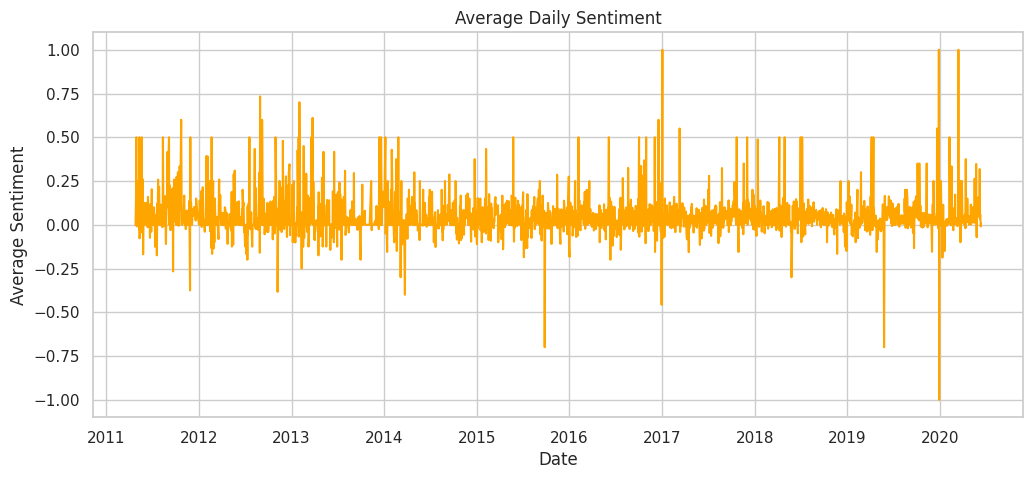

In [7]:
# Average sentiment per day
daily_sentiment = news_df.groupby('publish_date')['sentiment'].mean()

# Plot
plt.figure(figsize=(12,5))
daily_sentiment.plot(color='orange')
plt.title("Average Daily Sentiment")
plt.xlabel("Date")
plt.ylabel("Average Sentiment")
plt.show()